In [77]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.datasets import make_regression

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def LinearKernel(thetas, X1, X2=None):
    if X2 is None:
        X2 = X1
    assert len(X1.shape) == 2
    assert len(X2.shape) == 2
    
    return (X1 @ X2.transpose(0, 1))[None].repeat(thetas.shape[0], 1, 1)

In [144]:
def GaussianKernel(thetas, X1, X2=None):
    if X2 is None:
        X2 = X1
    assert len(X1.shape) == 2
    assert len(X2.shape) == 2
    
    diff = ((X1[:, None, :] - X2[None, :,:]) ** 2).sum(dim=2)
    print(diff[None].repeat(thetas.shape[0], 1, 1).shape)
    
    return torch.exp(
        (-.5 * (diff[None].repeat(thetas.shape[0], 1, 1)).transpose(0, 2) / 
        ((thetas[:, 0]) ** 2)).transpose(0, 2)
    )

In [145]:
X = torch.randn(15, 3)
Y = torch.randn(43, 3)
thetas = torch.randn(50, 1)
GaussianKernel(thetas, X, Y).shape

torch.Size([50, 15, 43])


torch.Size([50, 15, 43])

In [169]:
class GPDatasetLoss:
    def __init__(self, K, X, y, max_batch_size=1000000):
        self.K = K
        self.X = X.to('cpu')
        self.y = y.to('cpu')
        self.max_batch_size = max_batch_size
        self.device = 'cpu'
    
    def to(self, device):
        self.X = self.X.to(device)
        self.Y = self.Y.to(device)
        self.device = device
        
    def __call__(self, thetas):
        assert len(thetas) <= self.max_batch_size
        
        noise = (thetas[:,-1] ** 2) [:, None, None] * torch.eye(X.shape[0]).repeat(thetas.shape[0], 1, 1)
        sigma = self.K(thetas[:, :-1], X, X) + noise
        print
        
        neg_L = .5 * torch.logdet(sigma) + .5 * (((torch.inverse(sigma) @ y)) @ y)
        neg_L += (X.shape[0] / 2.) * np.log(2 * np.pi)
        
        return neg_L

In [170]:
X, y = make_regression(30, 2)
y = (y-y.mean()) / y.std()
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

torch.Size([100, 30, 30])


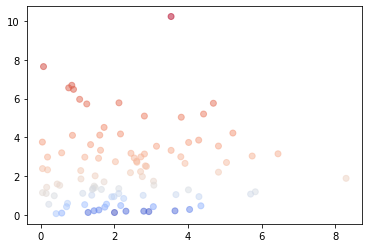

In [178]:
gp_loss = GPDatasetLoss(GaussianKernel, X, y)
# thetas = torch.mestorch.linspace(0.01, 1, steps=20000).reshape(-1, 1)
thetas = torch.abs(torch.randn(100, 2) * 3)
loss = gp_loss(thetas).numpy().round(2)

if thetas.shape[1] == 2:
    plt.scatter(thetas[:, 0], thetas[:, 1], c=loss, cmap='coolwarm', alpha=0.5)

In [177]:
thetas[np.argmin(loss)]

tensor([-2.8197,  0.0173])

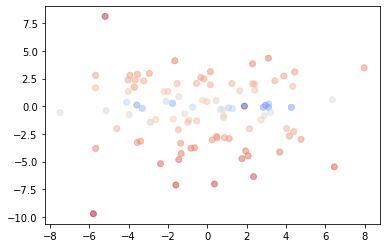

In [20]:
y = torch.randn(30)
Sigma = torch.randn(95, 30, 30)
(((Sigma @ y)) @ y).shape

torch.Size([95])

In [10]:
torch.logdet(torch.randn(1500, 20, 20))

tensor([20.7347,     nan,     nan,  ...,     nan,     nan,     nan])